# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [53]:
# Checking the number of mice.
len(mouse_complete["Mouse ID"].unique())

249

In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate = mouse_complete[mouse_complete.duplicated()]
duplicate = mouse_complete.loc[mouse_complete.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all = mouse_complete[mouse_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop = mouse_complete.drop_duplicates(inplace=True)
mouse_clean = mouse_complete[mouse_complete['Mouse ID'] != 'g989'] 
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [57]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean["Mouse ID"].unique())

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_type = mouse_clean.set_index('Drug Regimen').groupby(['Drug Regimen'])
mean_tumor_volume = regimen_type['Tumor Volume (mm3)'].mean()

median_tumor_volume = regimen_type['Tumor Volume (mm3)'].median()
tumor_volume_variance = regimen_type['Tumor Volume (mm3)'].var()
tumor_volume_SD = regimen_type['Tumor Volume (mm3)'].std()
tumor_volume_SEM = regimen_type['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_summary = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume, 'Median Tumor Volume':median_tumor_volume,
                               'Tumor Volume Variance':tumor_volume_variance, 'Tumor Volume Std. Dev':tumor_volume_SD,
                               'Tumor Volume St. Err.':tumor_volume_SEM})
# Assemble the resulting series into a single summary DataFrame.
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [60]:
regimen_count = mouse_clean['Drug Regimen'].value_counts()
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

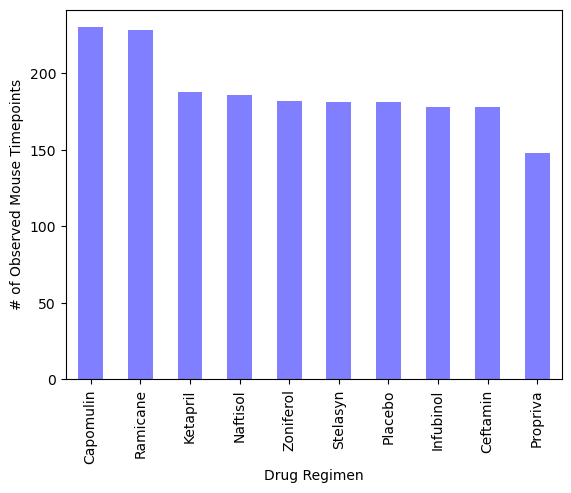

<Figure size 640x480 with 0 Axes>

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_chart = regimen_count.plot(kind='bar', color='blue', alpha=0.5, rot=90)
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

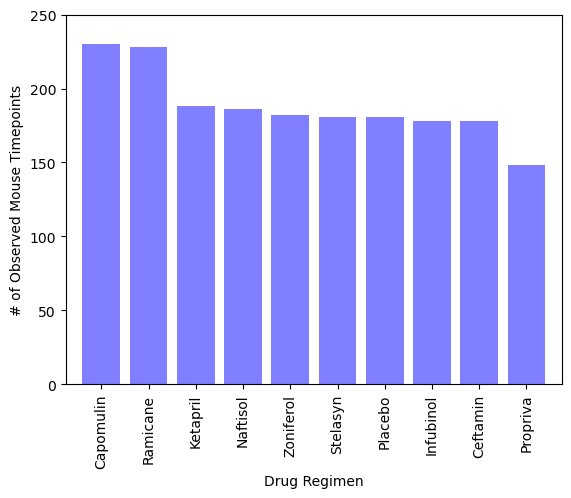

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimens = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x = np.arange(len(regimens))

plt.bar(x, regimens, color='blue', alpha=0.5, align='center')
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation='vertical')
plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(regimens) + 20)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [63]:
gender_table = mouse_clean['Sex'].value_counts()
gender_table

Male      958
Female    922
Name: Sex, dtype: int64

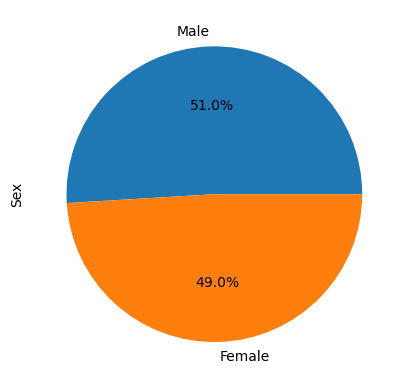

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = gender_table.plot(kind="pie", autopct='%.1f%%', y='Sex')
gender_plot.set_ylabel("Sex")
plt.show()

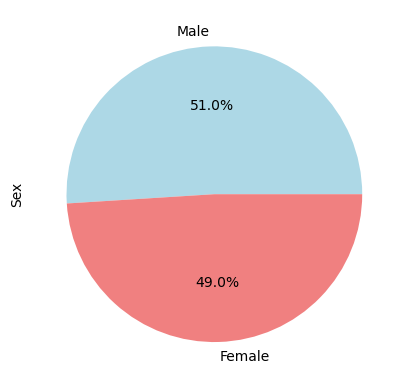

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51, 49]
colors = ["lightblue", "lightcoral"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False)
plt.ylabel('Sex')
plt.axis=("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = mouse_clean.groupby(['Mouse ID'])["Timepoint"].max()
final_tumor_df = final_tumor_df.reset_index()                              

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = final_tumor_df.merge(mouse_clean,on=['Mouse ID','Timepoint'],how="left")
merged_mouse



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume= []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_volume = merged_mouse.loc[merged_mouse["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor = total_tumor_volume.append(tumor_volume)
    

    quartiles = merged_mouse["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq= quartiles[0.75]
    iqr = upperq-lowerq
    
    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mouse_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | ([tumor_volume] > upper_bound)]
    #outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
   
    print(f"Values for {drug} may be {mouse_outliers}.")
print(f"Values for tumor size below {lower_bound} and {upper_bound} could be outliers.")

Values for Capomulin may be Series([], Name: Tumor Volume (mm3), dtype: float64).
Values for Ramicane may be Series([], Name: Tumor Volume (mm3), dtype: float64).
Values for Infubinol may be Series([], Name: Tumor Volume (mm3), dtype: float64).
Values for Ceftamin may be Series([], Name: Tumor Volume (mm3), dtype: float64).
Values for tumor size below 17.10923096124998 and 93.82025999125003 could be outliers.


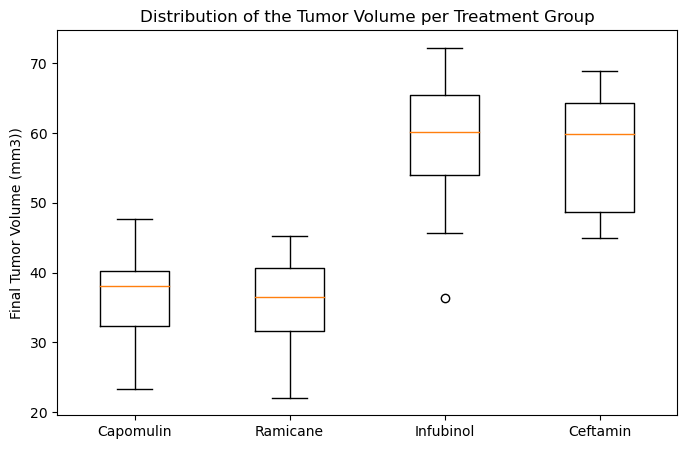

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_data = [total_tumor_volume]
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title('Distribution of the Tumor Volume per Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3))')
ax1.boxplot(total_tumor_volume, labels=drugs, vert=True)
plt.show()

## Line and Scatter Plots

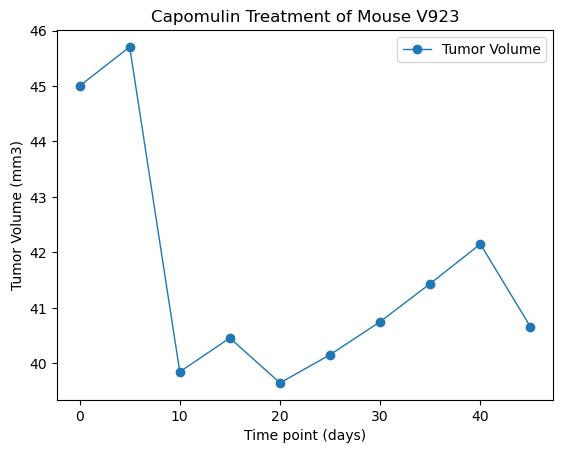

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]


one_mouse = cap_df.loc[cap_df["Mouse ID"] == "v923"]
one_mouse

x= one_mouse["Timepoint"]
y = one_mouse["Tumor Volume (mm3)"]
plt.plot(x, y, linewidth=1, marker="o", color="tab:blue", label="Tumor Volume")
plt.title("Capomulin Treatment of Mouse V923")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

plt.savefig("../Images/CapomulinV923.png")
plt.show()

/var/folders/19/5vj7_cdj7ns2bg2k2ds3nnjw0000gr/T/ipykernel_826/4185806579.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_vol = cap_df.groupby(["Mouse ID"]).mean()


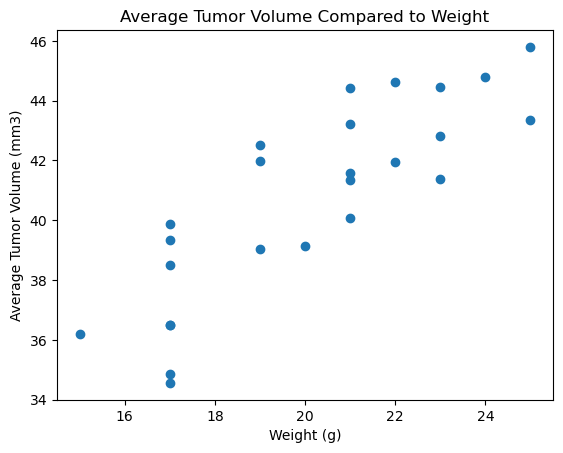

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_vol = cap_df.groupby(["Mouse ID"]).mean()

x= average_tumor_vol['Weight (g)']
y= average_tumor_vol['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.title("Average Tumor Volume Compared to Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


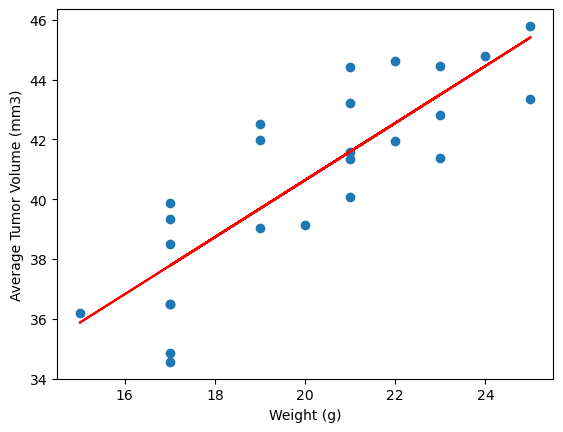

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
